## **Comprehensive Analysis of Mpox Outbreak: Demographics, Symptomatology, and Regional Trends**

## Objective:
The objective of this study is to analyze the outbreak of mpox by examining its spread across different demographics, symptom patterns, and geographical regions. The study aims to answer key questions that could inform public health strategies and resource allocation to manage and mitigate future outbreaks effectively.

1. Which demographics are most affected by mpox, and how does this vary by region?
2. What are the most common symptoms of mpox, and do they vary by gender?
3. How has the mpox outbreak progressed over time across different regions?
4. What is the burden of mpox on healthcare systems (hospitalization, ICU admissions, deaths)?
5. Which regions and countries have the highest rates of cases and deaths?

## Import the required libraries

In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-2-ed806232820c>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load the dataset

In [3]:
#Load the CSV files
df_aggregated = pd.read_csv('Aggregated mpox case data.csv')
df_symptom_onset = pd.read_csv('Country data by date of symptom onset.csv')
df_cases_by_country = pd.read_csv('mpox cases by country as of 30 June 2024.csv')
df_case_profiles = pd.read_csv('mpox case profiles.csv')
df_transmission_symptoms = pd.read_csv('mpox cases by transmission type (non-MSM).csv')

# Display the first few rows to verify the data is loaded correctly
print(df_aggregated.head())
print(df_symptom_onset.head())
print(df_cases_by_country.head())
print(df_case_profiles.head())
print(df_transmission_symptoms.head())

   country iso3 who_region month_start month_lab  cases  deaths
0  Andorra  AND       EURO  2024-01-01  Jan 2024      0       0
1  Andorra  AND       EURO  2024-02-01  Feb 2024      0       0
2  Andorra  AND       EURO  2024-03-01  Mar 2024      0       0
3  Andorra  AND       EURO  2024-04-01  Apr 2024      0       0
4  Andorra  AND       EURO  2024-05-01  May 2024      0       0
     country iso3 who_region         who_region_long reference_date date_type  \
0    Andorra  AND       EURO         European Region     2022-06-23     Onset   
1    Andorra  AND       EURO         European Region     2022-07-07     Onset   
2    Andorra  AND       EURO         European Region     2022-07-14     Onset   
3  Argentina  ARG       AMRO  Region of the Americas     2022-05-05     Onset   
4  Argentina  ARG       AMRO  Region of the Americas     2022-05-12     Onset   

   cases  
0      2  
1      1  
2      1  
3      1  
4      1  
  country iso3      who_region        date  total_confirmed_cas

## Clean and Prepare Data

In [4]:
# Check for missing values
print(df_aggregated.isnull().sum())
print(df_symptom_onset.isnull().sum())
print(df_cases_by_country.isnull().sum())
print(df_case_profiles.isnull().sum())
print(df_transmission_symptoms.isnull().sum())

country        0
iso3           0
who_region     0
month_start    0
month_lab      0
cases          0
deaths         0
dtype: int64
country            0
iso3               0
who_region         0
who_region_long    0
reference_date     0
date_type          0
cases              0
dtype: int64
country                  0
iso3                     0
who_region               0
date                     0
total_confirmed_cases    0
total_probable_cases     0
new_confirmed_cases      0
new_probable_cases       0
total_deaths             0
new_deaths               0
dtype: int64
Cause                        0
Yes                          0
No                           0
Unknown or\nMissing Value    0
Yes_pct                      0
No_pct                       0
dtype: int64
Symptom       0
n_all         0
pct_all       0
n_male        0
pct_male      0
n_female      0
pct_female    0
dtype: int64


In [5]:
# Fill or drop missing values as needed
df_aggregated = df_aggregated.dropna()
df_symptom_onset = df_symptom_onset.dropna()
df_cases_by_country = df_cases_by_country.dropna()
df_case_profiles = df_case_profiles.fillna(0)
df_transmission_symptoms = df_transmission_symptoms.fillna(0)

In [6]:
# Convert percentage columns to numeric
df_case_profiles['Yes_pct'] = pd.to_numeric(df_case_profiles['Yes_pct'])
df_case_profiles['No_pct'] = pd.to_numeric(df_case_profiles['No_pct'])
df_transmission_symptoms['pct_all'] = pd.to_numeric(df_transmission_symptoms['pct_all'])
df_transmission_symptoms['pct_male'] = pd.to_numeric(df_transmission_symptoms['pct_male'])
df_transmission_symptoms['pct_female'] = pd.to_numeric(df_transmission_symptoms['pct_female'])

In [7]:
#Prepare Aggregated Data for Analysis
# Summarize data by region
df_region_summary = df_aggregated.groupby('who_region').agg({
    'cases': 'sum',
    'deaths': 'sum'
}).reset_index()

# Calculate case fatality rate
df_region_summary['case_fatality_rate'] = df_region_summary['deaths'] / df_region_summary['cases']

# Preview the regional summary
print(df_region_summary)

  who_region  cases  deaths  case_fatality_rate
0       AFRO   1854      13            0.007012
1       AMRO   1812       3            0.001656
2       EURO    826       3            0.003632
3      SEARO    135       9            0.066667
4       WPRO    572       3            0.005245


## Analyze Data
1. Demographic Analysis:

In [8]:
# Analyze demographic impact
df_demographics = df_case_profiles[['Cause', 'Yes', 'No', 'Yes_pct', 'No_pct']]

# Compare the impact on different demographics
df_demographics.sort_values(by='Yes', ascending=False, inplace=True)
print(df_demographics)

<ipython-input-8-206452e34803>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographics.sort_values(by='Yes', ascending=False, inplace=True)


                       Cause    Yes     No  Yes_pct  No_pct
0  Men who have sex with men  30516   5036    0.858   0.142
4        Sexual Transmission  19101   3699    0.838   0.162
1    Persons living with HIV  18628  17233    0.519   0.481
5               Hospitalized   6043  48070    0.112   0.888
3             Travel History   4084  22690    0.153   0.847
2              Health worker   1312  30918    0.041   0.959
7                       Died    145  55678    0.003   0.997
6                        ICU     48  15135    0.003   0.997


2. Symptom Analysis by Gender:

In [9]:
# Symptom prevalence by gender
df_symptom_summary = df_transmission_symptoms[['Symptom', 'n_all', 'pct_all', 'n_male', 'pct_male', 'n_female', 'pct_female']]

# Compare symptom prevalence between males and females
df_symptom_summary.sort_values(by='n_all', ascending=False, inplace=True)
print(df_symptom_summary)

                              Symptom  n_all  pct_all  n_male  pct_male  \
0                            Any rash  32319    0.885   31022     0.890   
1                               Fever  21143    0.579   20245     0.581   
2                       Systemic rash  19993    0.548   19030     0.546   
3                        Genital rash  18072    0.495   17543     0.503   
4                 Any lymphadenopathy  10930    0.299   10640     0.305   
5                            Headache  10530    0.288    9965     0.286   
6                         Muscle ache   9464    0.259    9053     0.260   
7             General lymphadenopathy   8430    0.231    8222     0.236   
8                             Fatigue   6543    0.179    6385     0.183   
9               Local lymphadenopathy   5813    0.159    5680     0.163   
10                        Sore throat   5534    0.152    5255     0.151   
11             Rash, unknown location   3466    0.095    3441     0.099   
12                       

3. Geographical Analysis:

In [10]:
# Analyze case progression over time by region
df_time_series = df_symptom_onset.groupby(['who_region', 'reference_date']).agg({
    'cases': 'sum'
}).reset_index()

# Convert dates to datetime format
df_time_series['reference_date'] = pd.to_datetime(df_time_series['reference_date'])

# Preview the time series data
print(df_time_series.head())

  who_region reference_date  cases
0       AFRO     2021-12-30      4
1       AFRO     2022-01-06     13
2       AFRO     2022-01-13      5
3       AFRO     2022-01-20      5
4       AFRO     2022-01-27      4


4. Healthcare System Impact:

In [11]:
# Analyze hospitalization and ICU data
df_healthcare_impact = df_case_profiles[df_case_profiles['Cause'].isin(['Hospitalized', 'ICU', 'Died'])]

# Calculate the percentage of hospitalization and ICU cases
df_healthcare_impact['Impact'] = df_healthcare_impact['Yes'] / (df_healthcare_impact['Yes'] + df_healthcare_impact['No'])
print(df_healthcare_impact)

<ipython-input-11-19952aa56e9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_healthcare_impact['Impact'] = df_healthcare_impact['Yes'] / (df_healthcare_impact['Yes'] + df_healthcare_impact['No'])


          Cause   Yes     No  Unknown or\nMissing Value  Yes_pct  No_pct  \
5  Hospitalized  6043  48070                      39220    0.112   0.888   
6           ICU    48  15135                      78150    0.003   0.997   
7          Died   145  55678                      37510    0.003   0.997   

     Impact  
5  0.111674  
6  0.003161  
7  0.002597  


## Visualize and Communicate Data

1. Visualize Demographic Impact:

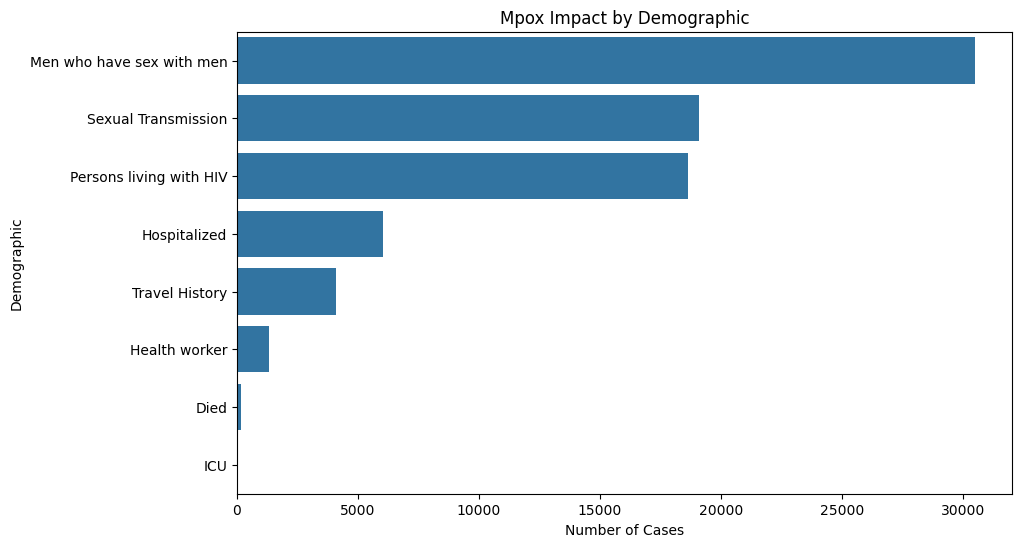

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for demographic impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Yes', y='Cause', data=df_demographics)
plt.title('Mpox Impact by Demographic')
plt.xlabel('Number of Cases')
plt.ylabel('Demographic')
plt.show()

2. Visualize Symptom Prevalence by Gender:

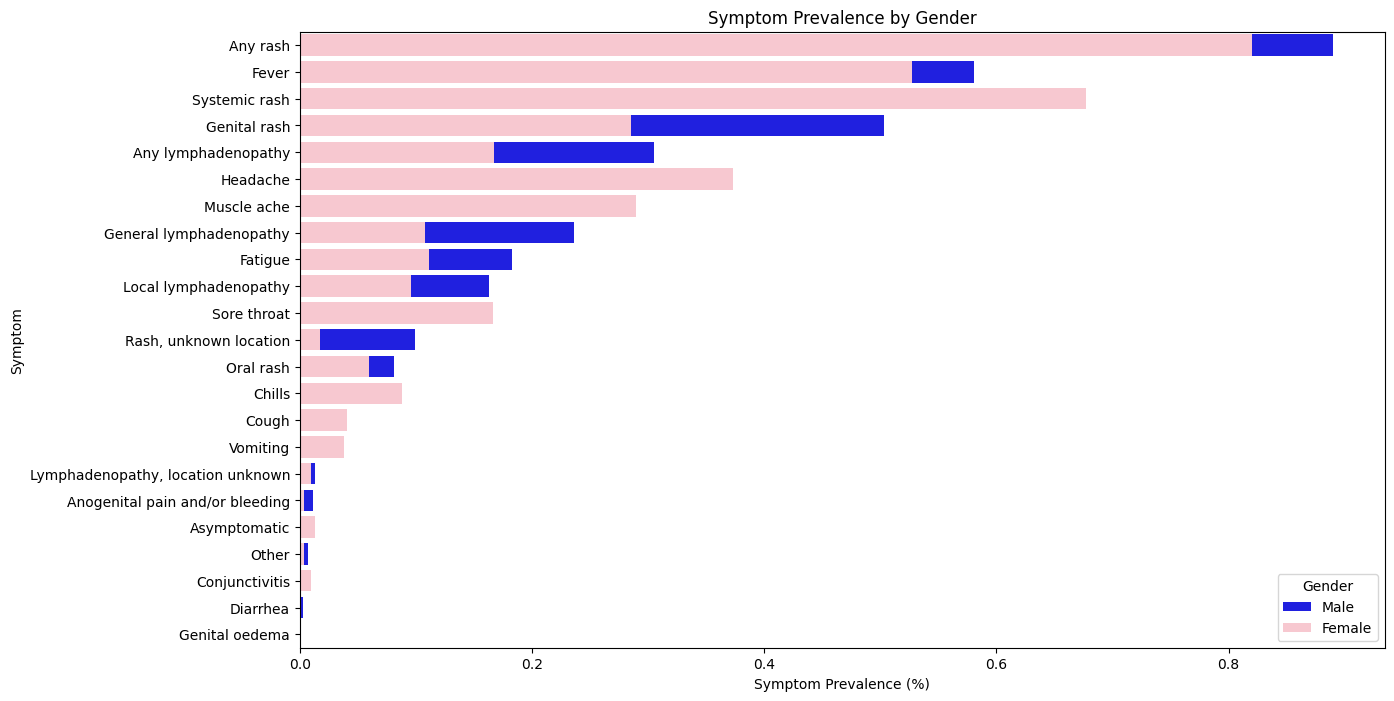

In [13]:
# Select the necessary columns for visualization
symptoms = df_symptom_summary['Symptom']
male_prevalence = df_symptom_summary['pct_male']
female_prevalence = df_symptom_summary['pct_female']

# Set up the figure and axes
plt.figure(figsize=(14, 8))

# Plot the data for male and female symptom prevalence
sns.barplot(x=male_prevalence, y=symptoms, color='blue', label='Male')
sns.barplot(x=female_prevalence, y=symptoms, color='pink', label='Female')

# Add labels and title
plt.xlabel('Symptom Prevalence (%)')
plt.ylabel('Symptom')
plt.title('Symptom Prevalence by Gender')
plt.legend(title='Gender')

# Show the plot
plt.show()

3. Visualize Case Progression Over Time:

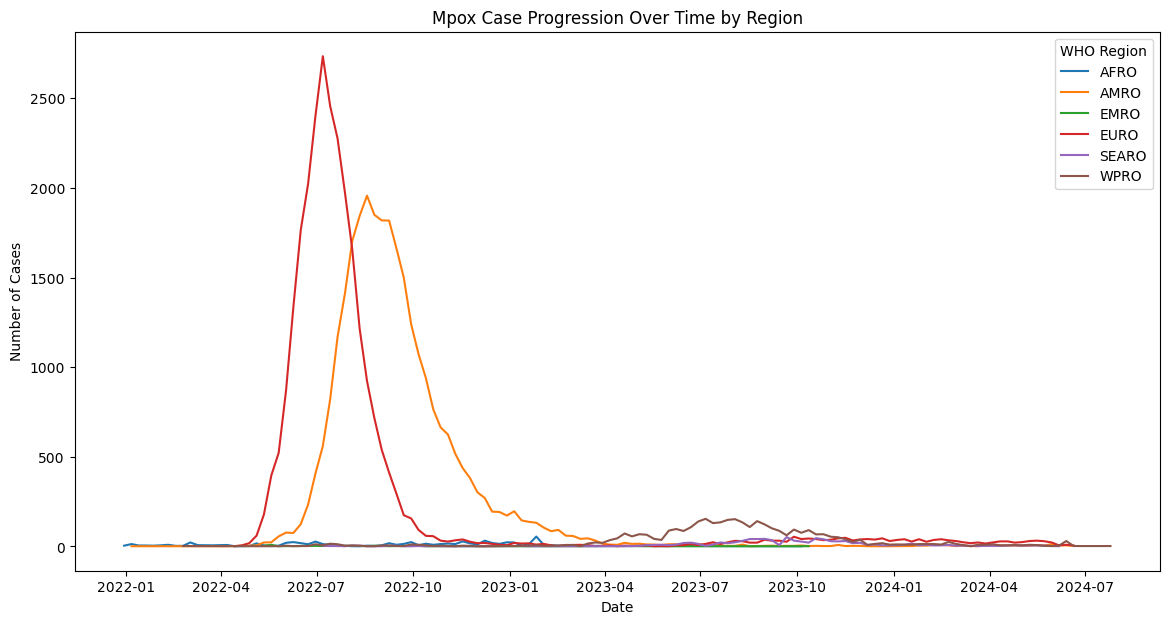

In [14]:
# Line plot for case progression over time by region
plt.figure(figsize=(14, 7))
for region in df_time_series['who_region'].unique():
    region_data = df_time_series[df_time_series['who_region'] == region]
    plt.plot(region_data['reference_date'], region_data['cases'], label=region)

plt.title('Mpox Case Progression Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='WHO Region')
plt.show()

4. Visualize Healthcare System Impact:

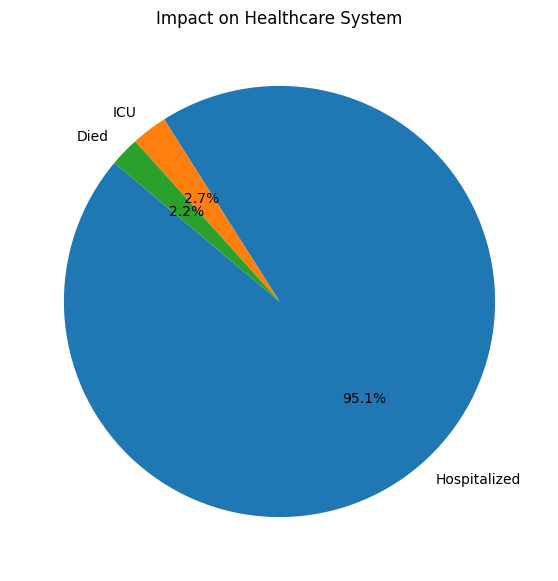

In [15]:
# Pie chart for healthcare system impact
labels = df_healthcare_impact['Cause']
sizes = df_healthcare_impact['Impact'] * 100

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Impact on Healthcare System')
plt.show()

5. Top 10 Countries by Mpox Cases as of 30 June 2024

<ipython-input-16-39b62922dfa4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_confirmed_cases', y='country', data=df_cases_by_country_sorted.head(10), palette='Reds')


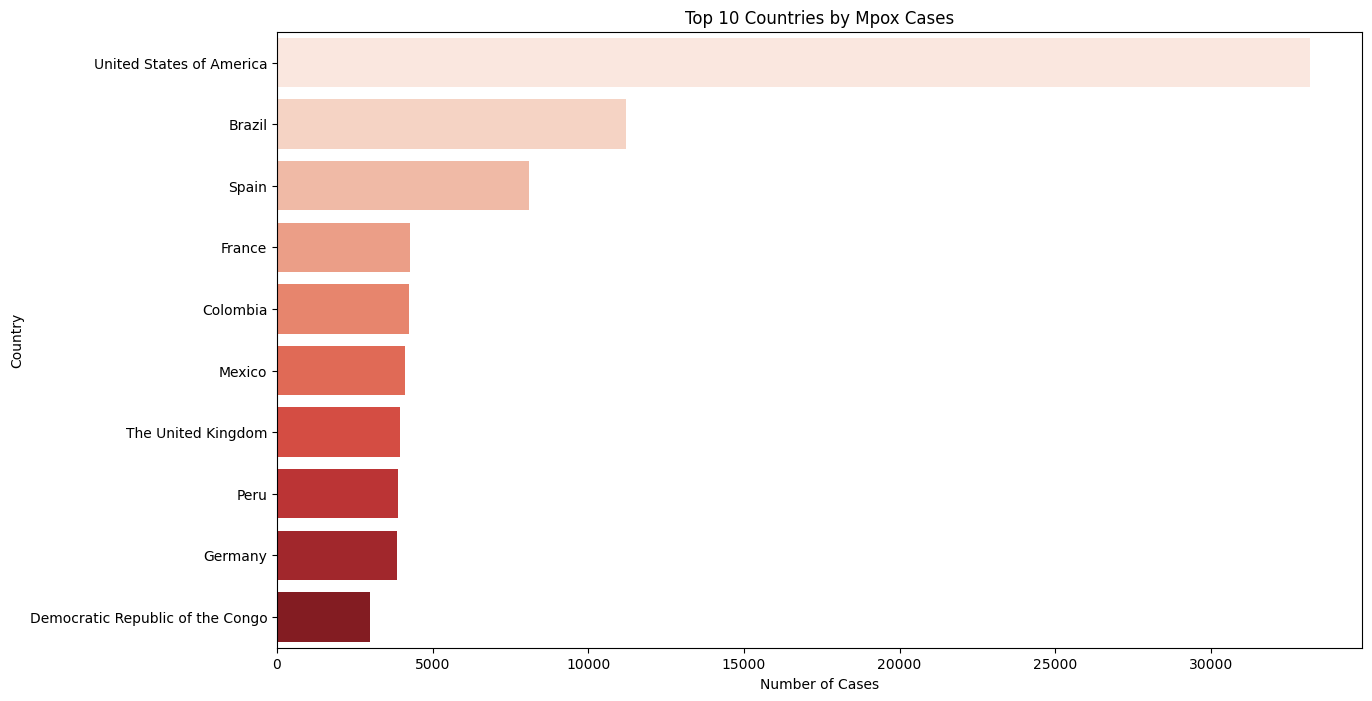

<ipython-input-16-39b62922dfa4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_deaths', y='country', data=df_deaths_by_country_sorted.head(10), palette='Blues')


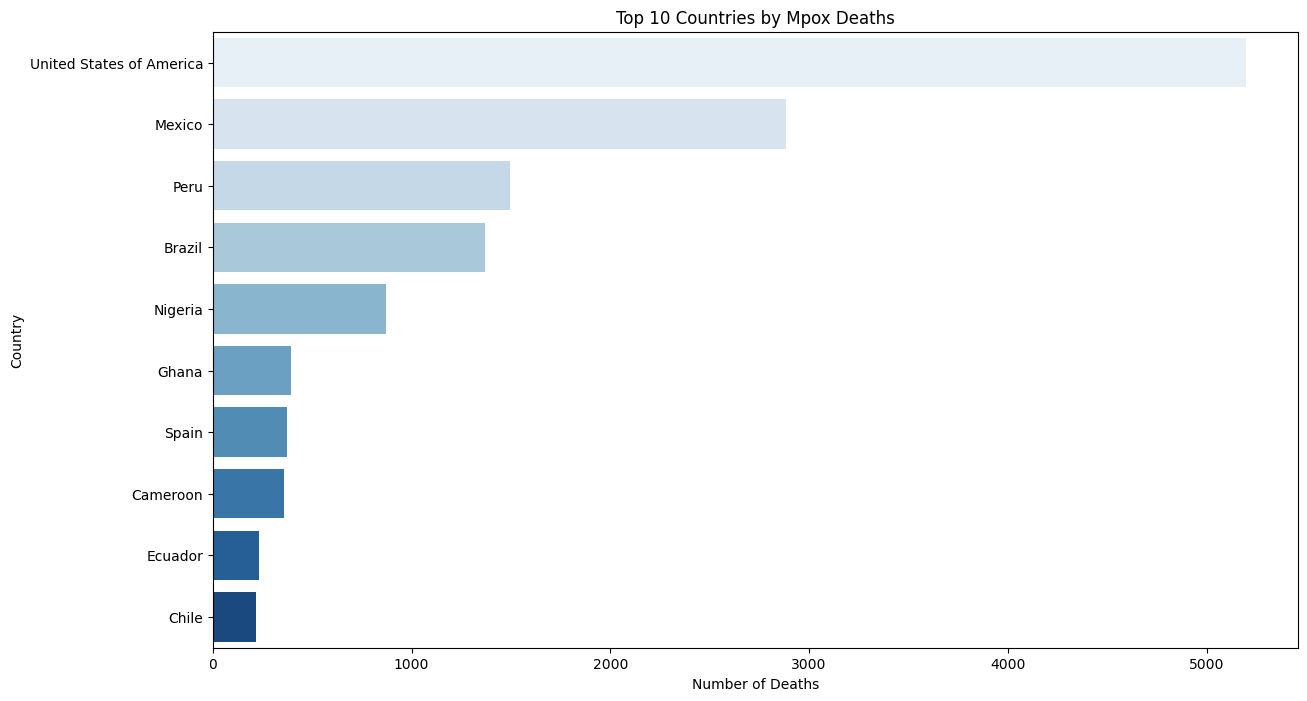

In [16]:
# Group by country or region and aggregate the cases and deaths
df_region_summary = df_cases_by_country.groupby('country').agg({'new_confirmed_cases': 'sum', 'total_deaths': 'sum'}).reset_index()

# Sort the DataFrame to find the regions with the highest cases and deaths
df_cases_by_country_sorted = df_region_summary.sort_values(by='new_confirmed_cases', ascending=False)
df_deaths_by_country_sorted = df_region_summary.sort_values(by='total_deaths', ascending=False)

# Plot top 10 countries by cases
plt.figure(figsize=(14, 8))
sns.barplot(x='new_confirmed_cases', y='country', data=df_cases_by_country_sorted.head(10), palette='Reds')
plt.title('Top 10 Countries by Mpox Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.show()

# Plot top 10 countries by deaths
plt.figure(figsize=(14, 8))
sns.barplot(x='total_deaths', y='country', data=df_deaths_by_country_sorted.head(10), palette='Blues')
plt.title('Top 10 Countries by Mpox Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Country')
plt.show()

## Conclusion and Communication:

1. Which demographics are most affected by mpox
- Men who have sex with men are most affected by mpox
2. What are the most common symptoms of mpox
- Any rash the most common symptoms of mpox
3. How has the mpox outbreak progressed over time across different regions?
- The highest spread of the mpox virus was on 04/22 to 01/23 and after that there was no significant spread of the virus
4. What is the burden of mpox on healthcare systems (hospitalization, ICU admissions, deaths)?
- 95.1% Hospitalization, 2.7% ICU admissions & 2.2% deaths
5. Which regions and countries have the highest rates of cases and deaths?
- USA the highest rates of cases and deaths

## Sources

2022-24 Mpox Outbreak: Global Trends. Geneva: World Health Organization, 2024. Available online: https://worldhealthorg.shinyapps.io/mpx_global/ (last cited: [date]).

Datasets : https://www.kaggle.com/datasets/aleemaher/monkeypox-who-data